In [1]:
import pandas as pd
import numpy as np
import collaborative_filter as cf
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
##read 2019 567 Menswear transaction data 
transaction_men_raw = pd.read_csv("../data/large_data/transaction_2019_567_Menswear.csv")
transaction_men_raw

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,60,2019-05-01,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001,0.050831,2,2019,5,18,743719,...,Shoes,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Cotton canvas trainers with a padded edge and ...
1,140,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031,0.015237,2,2019,5,18,507431,...,Jersey inactive from s1,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in hard-washed slub cotton jersey with...
2,141,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036,0.054220,2,2019,5,18,378447,...,Knitwear,F,Menswear,3,Menswear,23,Men Suits & Tailoring,1003,Knitwear,Jumper in fine-knit merino wool with a V-neck ...
3,142,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001,0.030492,2,2019,5,18,657850,...,Knitwear,F,Menswear,3,Menswear,20,Contemporary Smart,1003,Knitwear,Jumper in a textured-knit wool blend with long...
4,143,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015,0.013542,2,2019,5,18,598755,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,"Long, round-necked T-shirt in soft jersey with..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286342,5273975,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286343,5273976,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286344,5273978,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,663793009,0.022864,1,2019,7,31,663793,...,Underwear Jersey,F,Menswear,3,Menswear,26,Men Underwear,1017,"Under-, Nightwear",Briefs in stretch cotton jersey with flatlock ...
286345,5273979,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,501619019,0.022864,1,2019,7,31,501619,...,Shirt,F,Menswear,3,Menswear,20,Contemporary Smart,1011,Shirts,Shirt in an airy cotton weave with a turn-down...


In [8]:
%%time
AOP_results = []
MAP_results = []
num_users = []
timeline = []

# week 18 - 31
for wk in range(18,31):
    
    #mask_train = transaction_men_raw.week == wk
    mask_train = transaction_men_raw.week <= wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #print(wk, len(X_train), len(X_test))
    
    #Get recommended items via user-based collaborative filtering
    recommend_items = cf.all_item_collaborative_filter(X_train) 

    #calculate AOP@12 for each train-test group
    AOP12_top, num_user = cf.AOP(recommend_items, X_test)
    AOP_results.append(AOP12_top)

    #calculate MAP@12 for each train-test group
    MAP12_top, num_user = cf.MAP(recommend_items, X_test)
    MAP_results.append(MAP12_top)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))

100%|█████████████████████████████████████| 5993/5993 [00:01<00:00, 4376.62it/s]


Number of users: 379


100%|█████████████████████████████████████| 5993/5993 [00:01<00:00, 3602.91it/s]


Number of users: 379


100%|███████████████████████████████████| 10712/10712 [00:02<00:00, 3995.20it/s]


Number of users: 567


100%|███████████████████████████████████| 10712/10712 [00:02<00:00, 3621.54it/s]


Number of users: 567


100%|███████████████████████████████████| 16303/16303 [00:04<00:00, 3809.47it/s]


Number of users: 870


100%|███████████████████████████████████| 16303/16303 [00:04<00:00, 3796.98it/s]


Number of users: 870


100%|███████████████████████████████████| 22417/22417 [00:08<00:00, 2642.14it/s]


Number of users: 1226


100%|███████████████████████████████████| 22417/22417 [00:07<00:00, 2979.50it/s]


Number of users: 1226


100%|███████████████████████████████████| 29403/29403 [00:06<00:00, 4359.78it/s]


Number of users: 1219


100%|███████████████████████████████████| 29403/29403 [00:06<00:00, 4450.39it/s]


Number of users: 1219


100%|███████████████████████████████████| 34473/34473 [00:07<00:00, 4646.39it/s]


Number of users: 1301


100%|███████████████████████████████████| 34473/34473 [00:07<00:00, 4391.60it/s]


Number of users: 1301


100%|███████████████████████████████████| 39508/39508 [00:15<00:00, 2620.65it/s]


Number of users: 2244


100%|███████████████████████████████████| 39508/39508 [00:15<00:00, 2630.95it/s]


Number of users: 2244


100%|███████████████████████████████████| 47161/47161 [00:20<00:00, 2315.90it/s]


Number of users: 2947


100%|███████████████████████████████████| 47161/47161 [00:20<00:00, 2305.09it/s]


Number of users: 2947


100%|███████████████████████████████████| 55307/55307 [00:19<00:00, 2811.13it/s]


Number of users: 2767


100%|███████████████████████████████████| 55307/55307 [00:19<00:00, 2772.30it/s]


Number of users: 2767


100%|███████████████████████████████████| 61783/61783 [00:19<00:00, 3169.75it/s]


Number of users: 2527


100%|███████████████████████████████████| 61783/61783 [00:19<00:00, 3122.65it/s]


Number of users: 2527


100%|███████████████████████████████████| 67279/67279 [00:18<00:00, 3634.76it/s]


Number of users: 2508


100%|███████████████████████████████████| 67279/67279 [00:20<00:00, 3298.67it/s]


Number of users: 2508


100%|███████████████████████████████████| 72298/72298 [00:23<00:00, 3064.42it/s]


Number of users: 3032


100%|███████████████████████████████████| 72298/72298 [00:25<00:00, 2783.67it/s]


Number of users: 3032


100%|███████████████████████████████████| 78110/78110 [00:08<00:00, 9748.24it/s]


Number of users: 1167


100%|███████████████████████████████████| 78110/78110 [00:07<00:00, 9856.21it/s]

Number of users: 1167
CPU times: user 2h 15min 49s, sys: 2min 32s, total: 2h 18min 22s
Wall time: 2h 19min 29s


In [9]:
print(AOP_results)
print(MAP_results)
print(num_users)

[0.031002638522427454, 0.026748971193415644, 0.015900383141762463, 0.014953779227841224, 0.01585999453103636, 0.014347937483986684, 0.010546642899584076, 0.011452324397692556, 0.013130948078544747, 0.010222925735391101, 0.009070972886762351, 0.009207343887423025, 0.009925735504141685]
[0.04348278456128061, 0.02828315700890656, 0.02000130616509927, 0.016941209166943246, 0.0240062323891282, 0.018295612136888073, 0.015889842315867257, 0.014901318801471488, 0.016691395732324515, 0.013551525915495053, 0.01367925188698713, 0.011613298140342995, 0.013289348786349643]
[379, 567, 870, 1226, 1219, 1301, 2244, 2947, 2767, 2527, 2508, 3032, 1167]


In [10]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
#result_df.to_csv("../data/MenswearResults/item_based_cf.csv")
result_df.to_csv("../data/MenswearResults/item_based_cf_accum.csv")

result_df

,timeline,AOP,MAP,num_users
0,Wk_19,0.031003,0.043483,379
1,Wk_20,0.026749,0.028283,567
2,Wk_21,0.015900,0.020001,870
3,Wk_22,0.014954,0.016941,1226
4,Wk_23,0.015860,0.024006,1219
5,Wk_24,0.014348,0.018296,1301
6,Wk_25,0.010547,0.015890,2244
7,Wk_26,0.011452,0.014901,2947
8,Wk_27,0.013131,0.016691,2767
9,Wk_28,0.010223,0.013552,2527


In [12]:
#Read result csv
itemCF_df = pd.read_csv("../data/MenswearResults/item_based_cf_accum.csv").iloc[:,1:]
#itemCF_df = pd.read_csv("../data/MenswearResults/item_based_cf.csv").iloc[:,1:]
itemCF_df

,timeline,AOP,MAP,num_users
0,Wk_19,0.031003,0.043483,379
1,Wk_20,0.026749,0.028283,567
2,Wk_21,0.015900,0.020001,870
3,Wk_22,0.014954,0.016941,1226
4,Wk_23,0.015860,0.024006,1219
5,Wk_24,0.014348,0.018296,1301
6,Wk_25,0.010547,0.015890,2244
7,Wk_26,0.011452,0.014901,2947
8,Wk_27,0.013131,0.016691,2767
9,Wk_28,0.010223,0.013552,2527


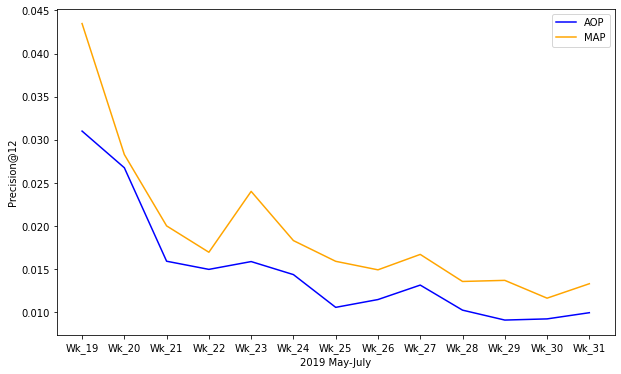

In [13]:
#plot for AOP MAP
plt.figure(figsize=(10,6))
plt.plot(itemCF_df.timeline, itemCF_df.AOP, color= 'blue')
plt.plot(itemCF_df.timeline, itemCF_df.MAP, color= 'orange')
plt.xlabel('2019 May-July')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])

In [4]:
#create user-article matrix of training data
df_t = pd.DataFrame({"customer":["A","A","A","B","B","B","C","C","C","D","D"],
                     "article":["a","a","b","a","b","c","c","d","e","d","e"],
                     "value":[1]*11})
df_t

,customer,article,value
0,A,a,1
1,A,a,1
2,A,b,1
3,B,a,1
4,B,b,1
5,B,c,1
6,C,c,1
7,C,d,1
8,C,e,1
9,D,d,1


In [5]:
#remove duplicate purchase history
df_t.drop_duplicates(inplace=True)

In [6]:
#convert transaction data to customer-by-article table and fill missing values with 0
article_customer_table = df_t.pivot(index='article', columns="customer")['value'].fillna(0)
article_customer_table

customer,A,B,C,D
article,,,,
a,1.0,1.0,0.0,0.0
b,1.0,1.0,0.0,0.0
c,0.0,1.0,1.0,0.0
d,0.0,0.0,1.0,1.0
e,0.0,0.0,1.0,1.0


In [7]:
article_idx_df = pd.DataFrame({'article':article_customer_table.index})
article_idx_df

,article
0,a
1,b
2,c
3,d
4,e


In [9]:
#conver dataframe to numpy array
matrix = np.array(article_customer_table)
matrix

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

In [10]:
similarity = cosine_similarity(matrix)
similarity

array([[1. , 1. , 0.5, 0. , 0. ],
       [1. , 1. , 0.5, 0. , 0. ],
       [0.5, 0.5, 1. , 0.5, 0.5],
       [0. , 0. , 0.5, 1. , 1. ],
       [0. , 0. , 0.5, 1. , 1. ]])

In [11]:
#sort index of similarity
sorted_sim_index = np.fliplr(np.argsort(similarity))
sorted_sim_index

array([[1, 0, 2, 4, 3],
       [1, 0, 2, 4, 3],
       [2, 4, 3, 1, 0],
       [4, 3, 2, 1, 0],
       [4, 3, 2, 1, 0]])

In [17]:
#find similar items for item c
np.where(article_idx_df.article == 'c')[0][0]

2